In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import plotly.express as px

DOWNLOAD DATA



In [ ]:
nba_data=pd.read_csv('https://raw.githubusercontent.com/derekbanas/tensorflow/main/nba_salary_stats.csv')
nba_data.head()

,first_name,last_name,team,salary,pos,age,g,gs,mp,fg,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,Precious,Achiuwa,TOR,2711280.0,C,22,73,28,1725,265,...,0.595,146,327,473,82,37,41,84,151,664
1,Bam,Adebayo,MIA,28103550.0,C,24,56,56,1825,406,...,0.753,137,427,564,190,80,44,148,171,1068
2,LaMarcus,Aldridge,BRK,2641691.0,C,36,47,12,1050,252,...,0.873,73,185,258,42,14,47,44,78,607
3,Grayson,Allen,MIL,4054695.0,SG,26,66,61,1805,255,...,0.865,32,190,222,100,46,18,43,96,733
4,Jarrett,Allen,CLE,20000000.0,C,23,56,56,1809,369,...,0.708,192,410,602,92,44,75,94,97,904


CONVERT TEXT INTO NUMERIC DATA

In [ ]:
Team=pd.get_dummies(nba_data['team'],drop_first=True)
Pos=pd.get_dummies(nba_data['pos'],drop_first=True)

MERGE THE DATASETS


In [ ]:

nba_data.fillna(0,inplace=True)
nba_data

,first_name,last_name,team,salary,pos,age,g,gs,mp,fg,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,Precious,Achiuwa,TOR,2711280.0,C,22,73,28,1725,265,...,0.595,146,327,473,82,37,41,84,151,664
1,Bam,Adebayo,MIA,28103550.0,C,24,56,56,1825,406,...,0.753,137,427,564,190,80,44,148,171,1068
2,LaMarcus,Aldridge,BRK,2641691.0,C,36,47,12,1050,252,...,0.873,73,185,258,42,14,47,44,78,607
3,Grayson,Allen,MIL,4054695.0,SG,26,66,61,1805,255,...,0.865,32,190,222,100,46,18,43,96,733
4,Jarrett,Allen,CLE,20000000.0,C,23,56,56,1809,369,...,0.708,192,410,602,92,44,75,94,97,904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,Dylan,Windler,CLE,2239200.0,SF,25,50,0,459,37,...,0.833,21,68,89,34,14,3,16,47,110
285,Christian,Wood,HOU,13666667.0,C,26,68,67,2094,440,...,0.623,110,576,686,155,54,65,126,171,1218
286,Delon,Wright,ATL,8526316.0,SG,29,77,8,1452,122,...,0.857,50,170,220,188,93,19,45,56,342
287,Omer,Yurtseven,MIA,1489065.0,C,23,56,12,706,130,...,0.623,85,209,294,49,17,20,41,84,299


DELETE UNNEEDED DATA

In [ ]:
nba_data_numeric=nba_data.copy()
del nba_data_numeric['first_name']
del nba_data_numeric['last_name']
del nba_data_numeric['team']
del nba_data_numeric['pos']
nba_data_numeric.head()

,salary,age,g,gs,mp,fg,fga,fg%,3p,3pa,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,2711280.0,22,73,28,1725,265,603,0.439,56,156,...,0.595,146,327,473,82,37,41,84,151,664
1,28103550.0,24,56,56,1825,406,729,0.557,0,6,...,0.753,137,427,564,190,80,44,148,171,1068
2,2641691.0,36,47,12,1050,252,458,0.550,14,46,...,0.873,73,185,258,42,14,47,44,78,607
3,4054695.0,26,66,61,1805,255,569,0.448,159,389,...,0.865,32,190,222,100,46,18,43,96,733
4,20000000.0,23,56,56,1809,369,545,0.677,1,10,...,0.708,192,410,602,92,44,75,94,97,904


CONVERT CURRENCY INTO FLOAT

In [ ]:
def clean_currency(x):
  if isinstance(x,str):
    return(x.replace('$','').replace(',',''))
    return(x)

BOX PLOT

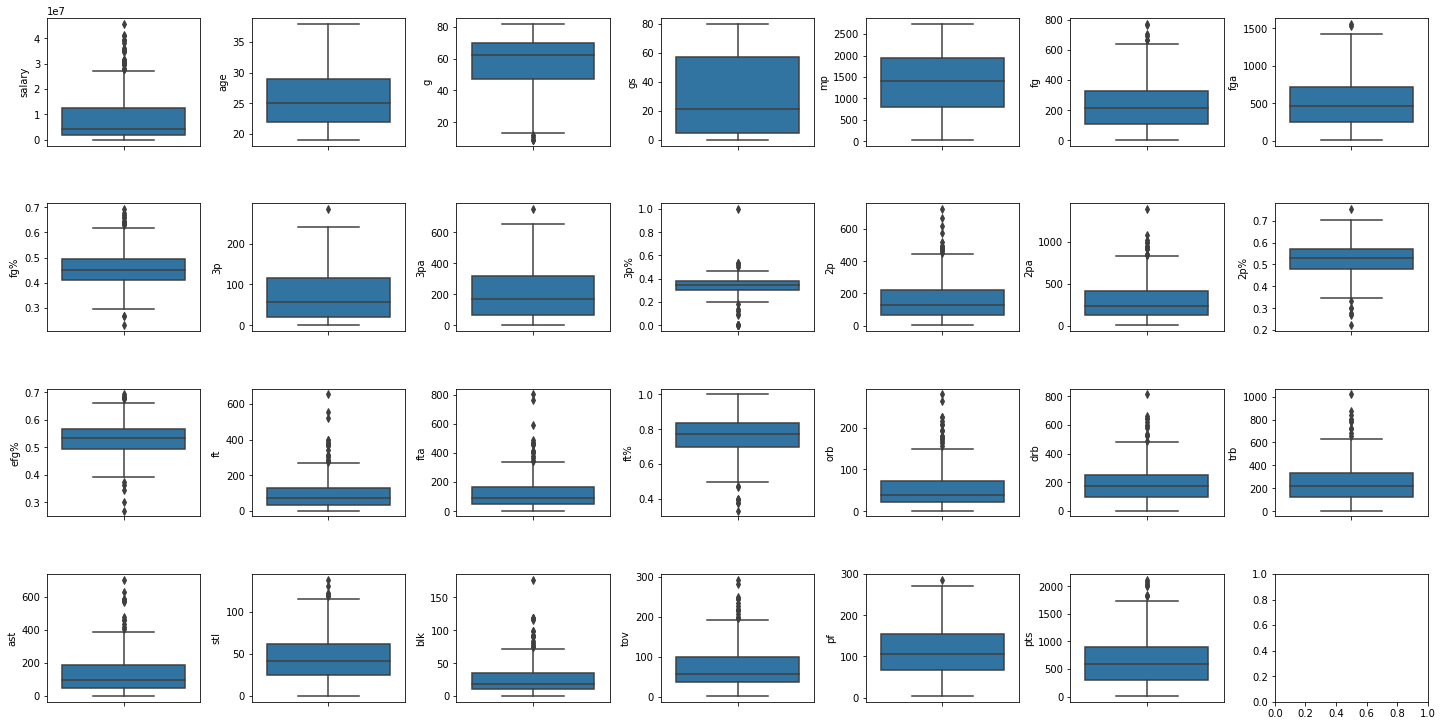

In [ ]:
fig, axs=plt.subplots(ncols=7,nrows=4,figsize=(20,10))
index=0
axs=axs.flatten()
for k,v in nba_data_numeric.items():
  sns.boxplot(y=k,data=nba_data_numeric,ax=axs[index])
  index +=1
plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=5.0)

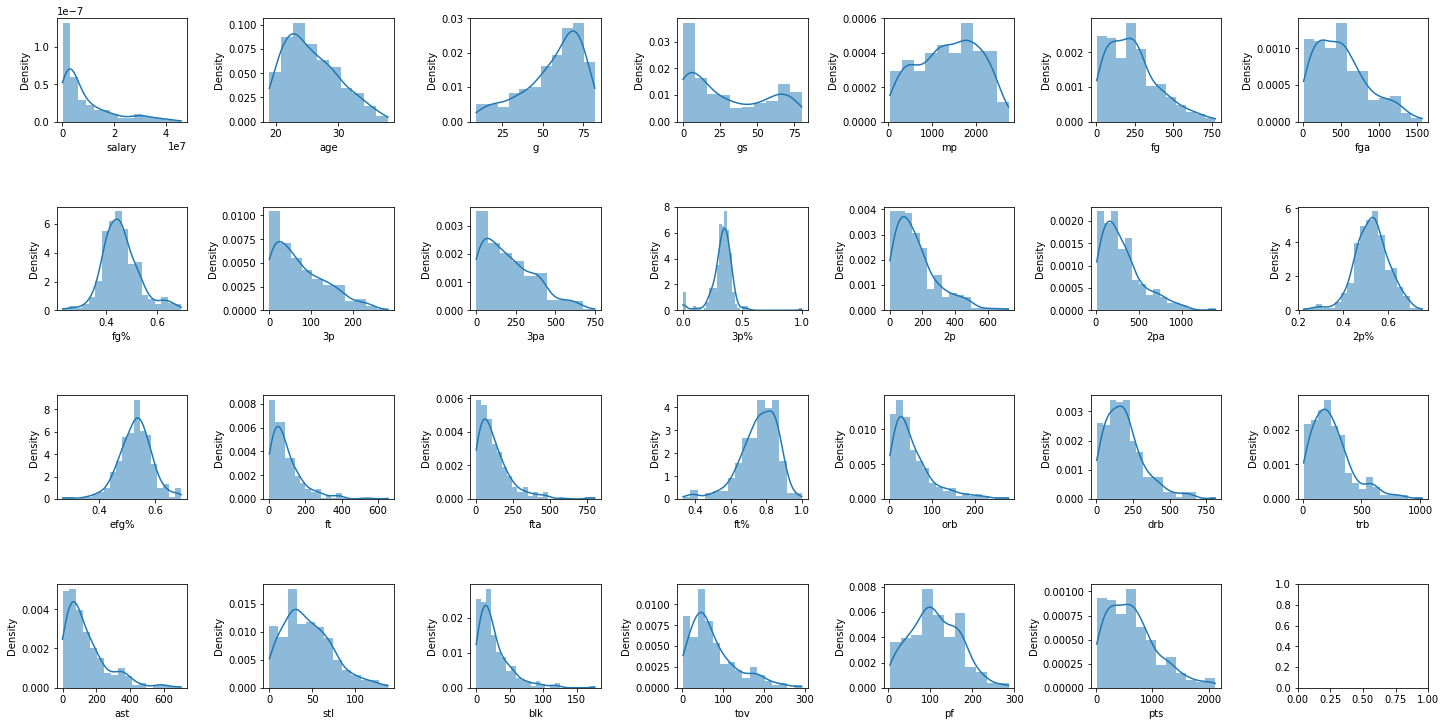

In [ ]:
fig,axs=plt.subplots(ncols=7,nrows=4,figsize=(20,10))
index=0
axs=axs.flatten()
for k,v in nba_data_numeric.items():
  sns.histplot(v,ax=axs[index],kde=True,stat='density',linewidth=0)
  index +=1
plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=5.0)

CORRELATION MATRIX

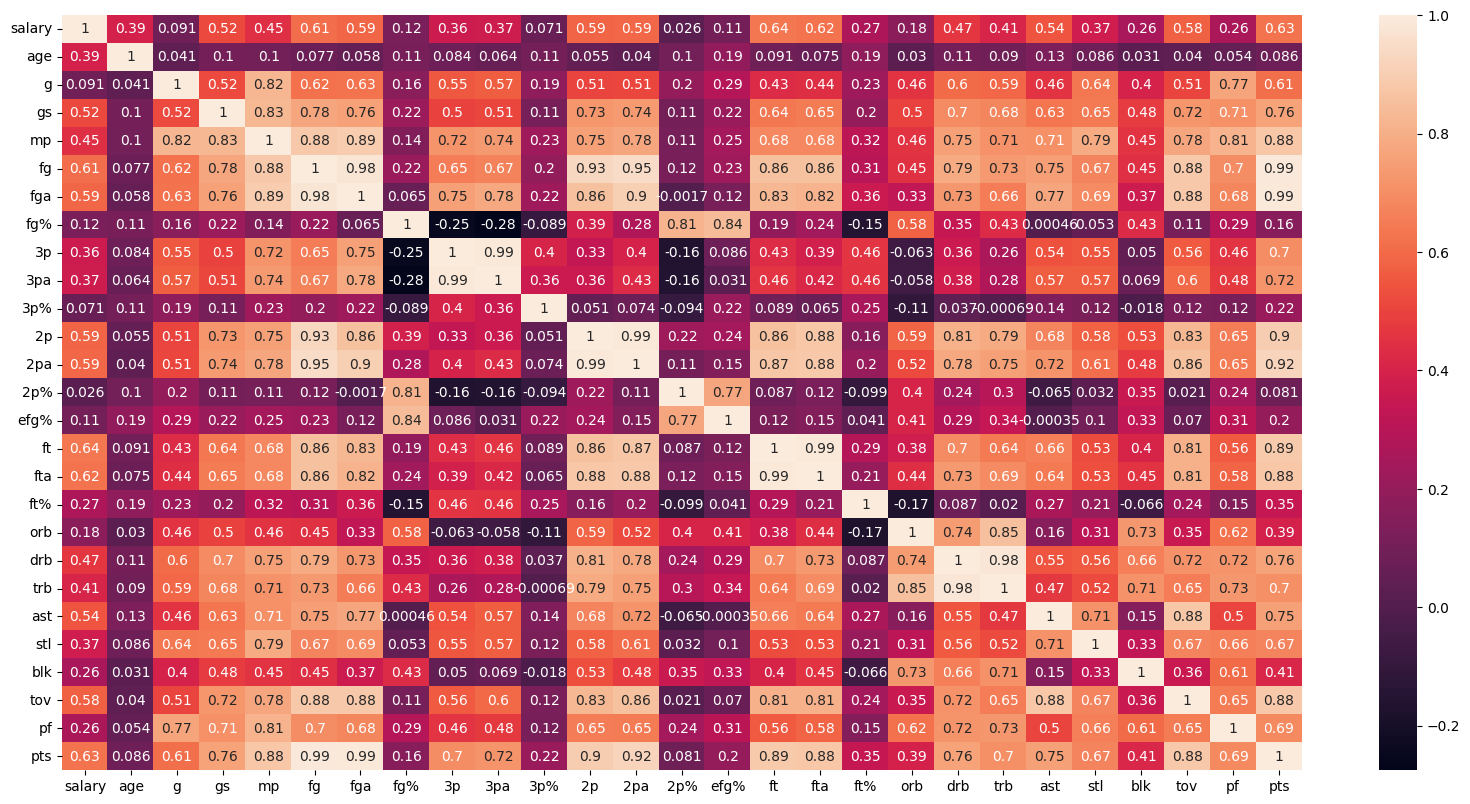

In [ ]:
plt.figure(figsize=(20,10),dpi=100)
sns.heatmap(nba_data_numeric.corr(),annot=True)

CALCULATING THE PERCENTAGE OF OUTLIERS

In [ ]:
#For this we will use interquartile ranges.
for k, v in nba_data_numeric.items():
  q1=v.quantile(0.25)
  q3=v.quantile(0.75)
  iqr=q3-q1
  v_col=v[(v<=q1-1.5*iqr)| (v>=q3+1.5*iqr)]
  perc=np.shape(v_col)[0]*100.0/np.shape(nba_data_numeric)[0]
  print("%s outliers =%.2f%%"%(k,perc))

salary outliers =9.69%
age outliers =0.00%
g outliers =1.73%
gs outliers =0.00%
mp outliers =0.00%
fg outliers =2.08%
fga outliers =0.69%
fg% outliers =4.84%
3p outliers =0.35%
3pa outliers =0.35%
3p% outliers =6.57%
2p outliers =4.50%
2pa outliers =4.15%
2p% outliers =2.42%
efg% outliers =3.81%
ft outliers =5.54%
fta outliers =5.54%
ft% outliers =2.77%
orb outliers =5.54%
drb outliers =4.15%
trb outliers =3.46%
ast outliers =4.15%
stl outliers =2.08%
blk outliers =5.54%
tov outliers =4.84%
pf outliers =0.35%
pts outliers =2.77%


TENSORFLOW NEURAL NETWORK REGRESSIONS

Tensors

Create Constant Tensor

In [ ]:
scalar=tf.constant(5)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=5>

Create a Vector
```

```



In [ ]:
vector=tf.constant([10,10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

Create a Matrix

In [ ]:
trix=tf.constant([[1,2],[3,4]])
trix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

CREATE A TENSOR

In [ ]:
tensor=tf.constant([[[1,2,3],
                     [4,5,6]],
                     [[7,8,9],
                     [10,11,12]],
                     [[13,14,15],
                     [16,17,18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

CREATE A TENSOR THAT CAN BE CHANGED

In [ ]:
v_tensor=tf.Variable([5,6])
v_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([5, 6], dtype=int32)>

GET AND CHANGE VALUES

In [ ]:
print("Index 0:",v_tensor[0])
v_tensor[0].assign(8)
print("Index 0:",v_tensor[0])


Index 0: tf.Tensor(5, shape=(), dtype=int32)
Index 0: tf.Tensor(8, shape=(), dtype=int32)


RANDOM TENSORS

In [ ]:
rand_tensor=tf.random.Generator.from_seed(66)
rand_tensor